In [1]:
import numpy as np

**http://www.mooc.ai/course/364/learn#lesson/2118**  链接<br>

## Part1 KNN 

1、训练：简单地把$\color{red}{所有训练数据}$训练<br>
2、测试：测试数据分别和$\color{red}{所有训练数据}$计算距离，选取$\color{red}{k个最近}$的训练样本的label，通过$\color{red}{投票（vote）}$获得预测值

In [ ]:
### 核心代码
#计算距离
## 方法一：两层循环计算距离
for i in range(num_test):
    for j in range(num_train):
        dists[i][j]=np.linalg.norm(X[i] - self,X_train[j])
## 方法二：单循环 广播机制       
## 维度 X[i,:]是（1，D） X_train维度（num_train,D） dist[i,:] (1,num_train)
for i in range(num_test):
    dist[i,:]=np.linalg.norm(X[i,:]-self.X_train[:],axis=1)
## 方法二：无循环 利用矩阵乘和广播机制
## 广播机制会自动让两个矩阵同纬度，比如（m，1）和（1，n） 最后输出（m，n）
dists+=np.sum(np.multiply(X,X),axis=1,keepdims=True).reshape(num_test,1)
dists+=np.sum(np.multiply(self.X_train,self.X_train),axis=1,keepdims=True).reshape(1,num_train)
dists+=-2*np.dot(X,self.X_train.T)
dists=np.sqrt(dists)
## keepdims 会把每一行变成一个列表
#写法2：
dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(self.X_train**2, axis=1) - 2 * X.dot(self.X_train.T))


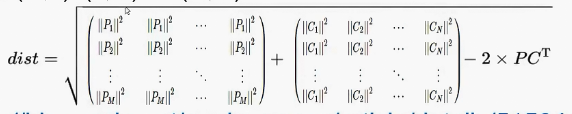

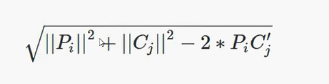

In [ ]:
#预测
## np.argsort()可以对dist进行排序选出k个最近的训练样本的下标
## np.bincount()会统计输入数组出现的频数，结合np.argmax（）就可以实现vote机制
closest_y =self.y_train[np.argsort(dists[i])[:k]]  #存储的是前k个距离最小的分类器-列表形式
y_pred[i]=np.argmax(np.bincount(closest_y))
##写法2：
top_k_indx=np.argsort(dists[i])[:k]
closest_y=self.y_train[top_k_indx]
vote=Counter(closest_y)
count=vote.most_common()
y_pred[i]=count[0][0]

## Part2 svm

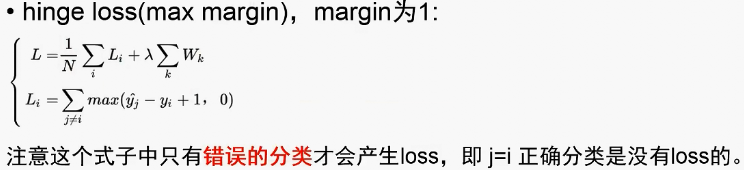

In [ ]:
scores=X.dot(W)
margin=scores-scores[np.arange(num_train),y].reshape(num_train,1)+1
# scores[np.arange(num_train),y] 花式索引 即正确分类的得分
margin[np.arange(num_train),y]=0.0 #处理i=j的情况
margin=(margin>0)*margin #把负数情况变成0
loss+=margin.sum()/num_train
loss+=0.5*reg*np.sum(W*W)

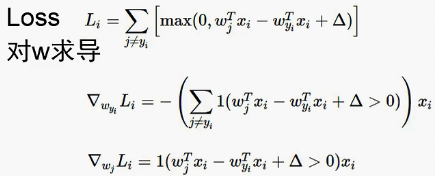

In [ ]:
margin=(margin>0)*1
row_sum=np.sum(margin,axis=1)
margin[np.arange(num_train),y]=-row_sum
dW=X.T.dot(margin)/num_train+reg*W
## trick：求和号的地方用乘法，最后又输出一个数，本质就就是矩阵乘


## Part3 Softmax

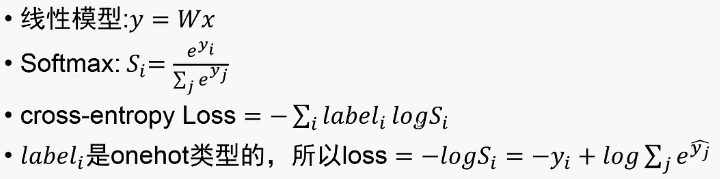

In [ ]:
socres=X.dot(W)
correct_class_score=score[np.arange(num_train),y].reshape(num_train,1)
exp_sum=np.sum(np.exp(scores),axis=1).reshape(num_train,1)
loss+=np.sum(np.log(exp_sum)-correct_class_scores)
loss/=num_train
loss+=reg*0.5*np.sum(W*W)

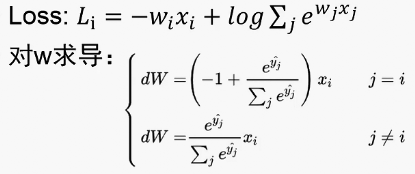

In [ ]:
margin=np.exp(scores)/exp_sum
margin[np.arange(num_train),y]+=-1
dW=X.T.dot(margin)
dW/=num_train
dW+=reg*W

## Part4 Two-Layer NN

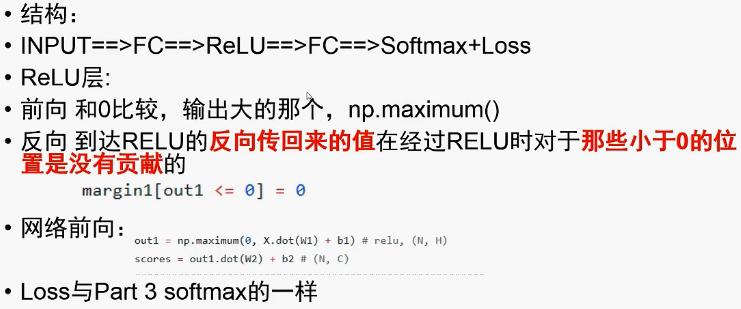

In [ ]:
out1=np.maximum(0,X.dot(w1)+b1) #relu (N,H)
scores=out1.dot(W2)+b2 #(N,C)

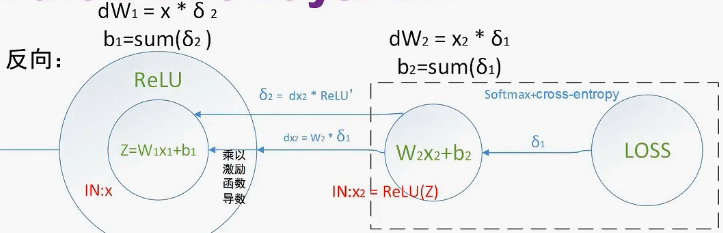

In [ ]:
margin=np.exp(scores)/exp_sum
margin[np.arange(N),y]=-1
margin/=N #(N,C)
## 这就是delta1

In [ ]:
dW2=out1.T.dot(margin) #(H,C)
dW2+=reg*W2
grad['W2']=dW2
grad['b2']=np.sum(margin,axis=0) #按列其出每个分类器的下降bias梯度

In [ ]:
margin1=margin.dot(W2.T) #(N,H)
margin1[out1<=0]=0 #relu
#delta2

In [ ]:
dW1=X.T.dot(margin1) #(D,H)
dW1+=reg*W1
grads['W1']=dW1
grad['b1']=np.sum(margin1,axis=0)

**https://zhuanlan.zhihu.com/p/22888385**

**线性可分视角：<br>
神经网络的学习就是学习如何利用矩阵的线性变换加激活函数的非线性变换，将原始输入空间投向线性可分/稀疏的空间去分类/回归。 <br>
增加节点数：增加维度，即增加线性转换能力。 <br>
增加层数：增加激活函数的次数，即增加非线性转换次数。**<br>
<br>
**物质组成视角：<br>
神经网络的学习过程就是学习物质组成方式的过程。 <br>
增加节点数：增加同一层物质的种类，比如118个元素的原子层就有118个节点。<br>
增加层数：增加更多层级，比如分子层，原子层，器官层，并通过判断更抽象的概念来识别物体。<br>**



### 梯度下降问题

#### 1、局部最小值

试图解决“卡在局部极小值”问题的方法分两大类：

**调节步伐**：调节学习速率，使每一次的更新“步伐”不同。常用方法有：
**随机梯度下降（Stochastic Gradient Descent (SGD)**：每次只更新一个样本所计算的梯度<br>
**小批量梯度下降（Mini-batch gradient descent）**：每次更新若干样本所计算的梯度的平均值<br>
**动量（Momentum）**：不仅仅考虑当前样本所计算的梯度；<br>
**Nesterov动量（Nesterov Momentum）**：Momentum的改进**Adagrad、RMSProp、Adadelta、Adam**：这些方法都是训练过程中依照规则降低学习速率，部分也综合动量<br>
<br>
**优化起点**：**合理初始化权重（weights initialization）、预训练网络（pre-train）**，使网络获得一个较好的“起始点”，如最右侧的起始点就比最左侧的起始点要好。<br>
常用方法有：高斯分布初始权重（Gaussian distribution）、均匀分布初始权重（Uniform distribution）、Glorot 初始权重、He初始权、稀疏矩阵初始权重（sparse matrix）